# Comparative Analysis of Epop2-IPF and Bhepop2: A Bayesian Heuristic Approach for High-Dimensional Population Synthesis


The purpose of this example is to compare the performance of the IPF and Bhepop2 algorithms to enrich a population. The graphic below describes the principle of this comparison. 

Starting from a sample of the population, considered as the initial population, an attribute is removed to get the depleted population. Aggregate data for the removed attribute is computed from the original population. Epop2-IPF or Bhepop2 are then carried out to predict the population with the knowledge of the depleted population and the aggregate data. 

The assessment of the prediction is performed through metrics which compute different distances from the predicted population to the original population.

In [6]:
!pip install mermaid-py
import mermaid as md


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


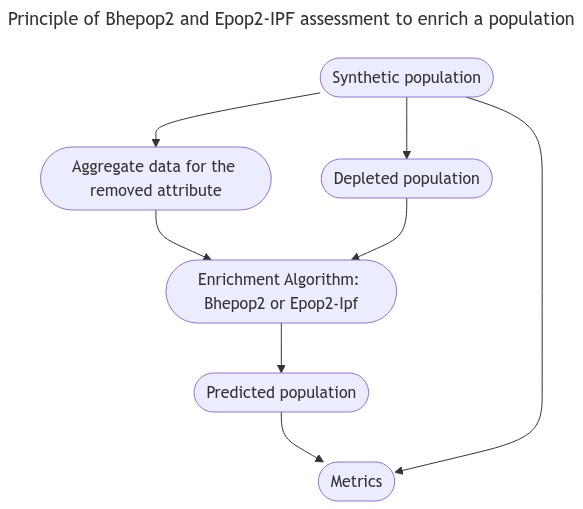

In [28]:
%%mermaidjs --img
---
title: Principle of  Bhepop2 and Epop2-IPF assessment to enrich a population
---

graph TD
    A --> B
    A --> C
    B --> D
    C --> D
    D --> E
    E --> F
    A --> F

    A(["Synthetic population"])
    C(["Depleted population"])
    B(["Aggregate data for the removed attribute"])
    D([" Enrichment Algorithm: Bhepop2 or Epop2-Ipf"])
    E(["Predicted population"])
    F(["Metrics"])

## Configurations of the population

### List of the configurations

#### Configuration 1

Population with few attributes i.e optimization in a low dimensional space (about 50), IPF and Bhepop2 can be carried out. Results of the two algorithms are presented.

- **initial population**  :  gender, diploma, employment (about 50 cross modalities to identify)
- **depleted population** : diploma, employment
- **aggregate data** : gender vs diploma, gender vs employment

#### Configuration 2

Population with numerous attributes i.e optimization in a high dimensional space (about 2000), IPF cannot be implemented due to numerical problems. Results of Bhepop2 are presented.

- **initial population**  : age, gender, profession, diploma, family situation, employment
- **depleted population** :
- **aggregate data** : age vs gender, age vs profession, age vs diploma, age vs employment, age vs family situation


#### Free configuration : 

Users can play with the algorithms by defining their own configuration.

In [29]:
# Data processing

# Parameters
random_seed = 33 # this seed is used in bhepop2 package to sample the population from the distribution of probability predicted by the optimization process


config1=False ########### CONFIGURATION 1 : low dimensional space  ####################
config2=True ##########   CONFIGURATION 2 : high dimensional space ####################
#else : test the configuration

if config1:

############ CONFIGURATION 1  ####################
#Configuration of the data compatible with IPF and Bhepop2 : Results of IPF and Bhepop2 are inline
    list_attributes_selected=['sexe_rec','DIPL_new', 'EMPL_new']
    list_attributes_to_remove=['sexe_rec']
    list_attributes_aggregate = ['DIPL_new','EMPL_new']
    list_comparison_attributes = list_attributes_selected
    nomfich='variables_config1'
############ END  CONFIGURATION 1 ####################

elif config2:
############ CONFIGURATION 2 ####################
# Configuration qui semble planter l'IPFN et Bhepop2 fonctionne sauf Mape divisé par zéro
    list_attributes_selected=['AGEREVQb','sexe_rec','prof', 'DIPL_new', 'SFM_agg','EMPL_new']
    list_attributes_to_remove=['AGEREVQb']
    list_attributes_aggregate = ['sexe_rec', 'prof', 'DIPL_new', 'SFM_agg','EMPL_new']
    list_comparison_attributes = ['AGEREVQb','sexe_rec','prof', 'DIPL_new']
    nomfich='variable_config2'
############ END  CONFIGURATION 2  ####################
else:
######## Others configurations
# Configuration 3
    list_attributes_selected=['sexe_rec','prof', 'DIPL_new']
    list_attributes_to_remove=['DIPL_new']
    list_attributes_aggregate = ['prof', 'sexe_rec']
    list_comparison_attributes = list_attributes_selected
    nomfich='toremove'

# Configuration 4
    list_attributes_selected=['AGEREVQb','sexe_rec','prof', 'DIPL_new', 'SFM_agg','EMPL_new']
    list_attributes_to_remove=['AGEREVQb']
    list_attributes_aggregate = ['prof','sexe_rec','prof', 'DIPL_new', 'SFM_agg','EMPL_new']
    list_comparison_attributes = ['AGEREVQb','sexe_rec','prof', 'DIPL_new']
    nomfich='toremove'



## Data

### Data setup

In order to run this notebook, users must download the binary file containing the data used by the following algorithms.

The binary file is stored in the Bhepop2 repository, in the release named [`population_menages_synthetiques.feather`](https://github.com/tellae/bhepop2/releases/tag/v2.0.0).
You can download it directly by clicking [this link](https://github.com/tellae/bhepop2/releases/download/v2.0.0/population_menages_synthetiques.feather).

Once you have downloaded the data, place it next to this notebook in the `/examples` folder of Bhepop2.

In [30]:
DATA_PATH='./population_menages_synthetiques.feather'

### Data contents

The file `population_menages_synthetiques.feather` stores a synthetic population of households using data drawn from the French census. These data are provided by the French National Institute of Statistics and Economic Studies (INSEE), consisting of census data samples from 207 cities within Loire-Atlantique jurisdiction, located in northwestern France with a population of roughly  1400 000. The main city, Nantes, is France's 6th largest (population: about 310 000). The census data samples included approximately 190 000 households; data were collected from 2016 to 2020 and adjusted to the reference year of 2018. Each observation in the samples represents a unique household and its main residential characteristics (household size, family composition, etc.). A statistical weight was also assigned to each household.
Several methods exist for generating a synthetic population from census data  Considering the quality of the data and given that generating the synthetic population is not the primary focus of this comparison, a simple method was chosen to create the synthetic population. To generate the synthetic population, the samples were weighted according to the weight of each household. However, since these weights are not integers, we applied the Truncate, Replicate, Sample (TRS) method to convert these fractional weights into integer values. The TRS method uses both deterministic and probabilistic sampling through a three-step process. First, we selected households with a weight above 1 and retained the integer part of these weights (Truncation step). The selected households were then replicated based on their integer weights (Replication step). In the last step (Sampling), the remaining households were randomly chosen with selection probabilities equal to the decimal part of the household weights. At the end of this process, we had obtained a synthetic population of approximately 630 000 households.

#### List of the population attributes

AGEREVQb: age with 21 possible values

sexe_rec: gender with 2 possible values

prof: profession with 10 possible values

DIPL_new: diploma with 5 possible values

SFM_agg: family situation with 7 possible values

EMPL_new: employment status with 5 possible values


In [31]:
import pandas as pd
import numpy as np

pop_synt_file =  pd.read_feather(DATA_PATH)
pop_synt  = pop_synt_file.copy()
pop_synt.dropna(inplace=True)
pop_synt.reset_index(drop=True, inplace=True)
print(pop_synt.head())
print("\nTotal population size", len(pop_synt))

  COMMUNE CANTVILLE NUMMI ACHLR AEMMR  AGED AGER20 AGEREV AGEREVQ  ANAI  ...  \
0   44001      4408    10     1     7    72     79    071     070  1948  ...   
1   44001      4408    10     1     7    72     79    071     070  1948  ...   
2   44001      4408    10     1     7    72     79    071     070  1948  ...   
3   44001      4408    10     1     7    72     79    071     070  1948  ...   
4   44001      4408    10     1     7    72     79    071     070  1948  ...   

  AGEREVQb_rec sexe_rec   CS1_rec      prof DIPL_rec  DIPL_new EMPL_rec  \
0         cat4    Homme  Retraite  Retraite       18  Sup_long       ZZ   
1         cat4    Homme  Retraite  Retraite       18  Sup_long       ZZ   
2         cat4    Homme  Retraite  Retraite       18  Sup_long       ZZ   
3         cat4    Homme  Retraite  Retraite       18  Sup_long       ZZ   
4         cat4    Homme  Retraite  Retraite       18  Sup_long       ZZ   

        EMPL_new aged2 aged3  
0  Autres_emploi    72    72  
1  Aut

### Some data preparation

In [32]:
# crossing of list_attributes_to_remove and list_attributes_aggregate
list_attributes_crossed_aggregate = [[list_attributes_to_remove[0], attr] for attr in list_attributes_aggregate] 
list_attributes_depleted = [attr for attr in list_attributes_selected if attr not in list_attributes_to_remove]

pop_synt = pop_synt.filter(items=list_attributes_selected)
pop_synt_depleted = pop_synt.copy()
pop_synt_depleted = pop_synt_depleted.filter(items=list_attributes_depleted)


print(list_attributes_crossed_aggregate)
print(list_attributes_depleted)
print(list_attributes_selected)
print(len(pop_synt))
print(len(pop_synt_depleted))

[['AGEREVQb', 'sexe_rec'], ['AGEREVQb', 'prof'], ['AGEREVQb', 'DIPL_new'], ['AGEREVQb', 'SFM_agg'], ['AGEREVQb', 'EMPL_new']]
['sexe_rec', 'prof', 'DIPL_new', 'SFM_agg', 'EMPL_new']
['AGEREVQb', 'sexe_rec', 'prof', 'DIPL_new', 'SFM_agg', 'EMPL_new']
629332
629332


## Epop2-IPF

### Formatting contingency tables for use with the `ipfn` package


In [33]:
# install necessary libraries

!pip install ipfn
!pip install pyarrow

from ipfn import ipfn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [34]:
def generate_tables_from_pop(pop_synt, list_attributes_marginals):
    """
    Generate a list of grouped tables directly from a DataFrame and selected attributes.

    :param pop_synt: DataFrame containing the population data
    :param list_attributes_marginals: List of attribute pairs for which to generate tables
    :return: List of grouped tables
    """
    # List to store the generated tables
    list_of_tables = []

    # Iterate over attribute pairs and generate grouped tables
    for attr_pair in list_attributes_marginals:
        # Group by the current attribute pair and sum the 'total' column directly
        table = pop_synt.groupby(attr_pair).size().reset_index(name='total').groupby(attr_pair)['total'].sum()
        # Append the generated table to the list
        list_of_tables.append(table)

    return list_of_tables


In [35]:
cross_table_pop_synt=pop_synt.groupby(list_attributes_selected).size().reset_index(name='total')
cross_table_depleted=cross_table_pop_synt.groupby(list_attributes_depleted)['total'].sum()
list_of_tables_crossed_aggregate = generate_tables_from_pop(pop_synt, list_attributes_crossed_aggregate)

# cross_table_new_attribute sera une liste et on lui associera une liste_attribute_marginale
cross_table_initial = cross_table_pop_synt.copy()
cross_table_initial['total'] = 1
print(list_of_tables_crossed_aggregate)



[AGEREVQb  sexe_rec
010       Femme          30
          Homme          51
015       Femme        4915
          Homme        4497
020       Femme       15904
          Homme       17119
025       Femme       16531
          Homme       26995
030       Femme       18038
          Homme       32262
035       Femme       19319
          Homme       34459
040       Femme       20445
          Homme       35379
045       Femme       23046
          Homme       37172
050       Femme       24260
          Homme       35060
055       Femme       27194
          Homme       32817
060       Femme       21668
          Homme       21698
065       Femme       20993
          Homme       24810
070       Femme       17018
          Homme       19627
075       Femme       13402
          Homme       13737
080       Femme       14228
          Homme       10775
085       Femme       11036
          Homme        6249
090       Femme        4866
          Homme        1998
095       Femme        1276


### Results of IPF

In [36]:
list_of_tables_marginals = [cross_table_depleted] + list_of_tables_crossed_aggregate
list_attributes_marginals = [list_attributes_depleted] + list_attributes_crossed_aggregate
IPF = ipfn.ipfn(cross_table_initial, list_of_tables_marginals, dimensions = list_attributes_marginals)
#IPF = ipfn.ipfn(cross_table_zero, [cross_table_depleted, cross_table_new_attribute], dimensions = [list_attributes_depleted, list_attributes_marginals])
try:
    cross_table_ipf=IPF.iteration()
    cross_table_ipf.head()
except Exception as e:
    print(f"IPF failed with error : {e}")
    IPF = None


IPF failed with error : ('Femme', 'Agri', 'Autres', 'ATM', 'Autres_emploi')


In [37]:
def create_pop_from_contingency_table(contingency_table):
    """
    Creates a synthetic population DataFrame from a contingency table.

    Args:
        contingency_table: A pandas DataFrame representing the contingency table.
                            It should have columns for each attribute and a 'total' column.

    Returns:
        A pandas DataFrame representing the synthetic population.
    """

    # Get the attribute names (excluding 'total')
    attribute_names = contingency_table.columns[:-1].tolist()

    # Create an empty list to store the synthetic population
    synthetic_population = []

    # Iterate over the rows of the contingency table
    for index, row in contingency_table.iterrows():
        # Get the values for each attribute
        attribute_values = row[attribute_names].tolist()

        # Get the total count for this combination of attributes
        total_count = round(row['total'])

        # Create a list of dictionaries representing individuals
        individuals = [{attr: val for attr, val in zip(attribute_names, attribute_values)}] * total_count

        # Add the individuals to the synthetic population
        synthetic_population.extend(individuals)

    # Create a DataFrame from the synthetic population
    synthetic_population_df = pd.DataFrame(synthetic_population)

    return synthetic_population_df

# Usage example:



In [38]:
if IPF is not None:
    pop_synt_ipf = create_pop_from_contingency_table(cross_table_ipf)
    print(cross_table_ipf['total'].sum().sum())
    print(len(pop_synt_ipf))
    print(pop_synt_ipf.head())

In [39]:
def metrics(complete_pop , predicted_pop,  selected_attibutes,list_attributes_crossed_aggregate, depleted_attributes, comparison_attributes):
  def replace_zeros_with_laplace(series):
    """
    Remplace les valeurs zéro dans une série par N + 1, où N est la longueur de la série.

    Parameters:
    series (pd.Series ou np.ndarray): La série de données à traiter.

    Returns:
    pd.Series ou np.ndarray: La série avec les zéros remplacés.
    """
    # Input is pandas series
    if isinstance(series, np.ndarray):
        series = pd.Series(series)
    elif not isinstance(series, pd.Series):
        raise ValueError("Input must be pandas Series or numpy ndarray.")

    N = len(series)
    replacement_value = 1

    # Replace zeros by N + 1
    series_replaced = series.replace(0, 1)

    return series_replaced


  # Find all combinations of modalities for marginals attributes
  all_combinations = pd.MultiIndex.from_product(
    [pd.unique(np.concatenate([complete_pop[attr].unique(), predicted_pop[attr].unique()])) for attr in selected_attibutes],
    names=selected_attibutes
)

# computation of the distance to both marginals : marginals of new attributes and cross modalities of depleted population
  list_of_tables_crossed_complete = generate_tables_from_pop(complete_pop, list_attributes_crossed_aggregate)
  list_of_tables_crossed_predicted = generate_tables_from_pop(predicted_pop, list_attributes_crossed_aggregate)

  if len(list_of_tables_crossed_complete) != len(list_of_tables_crossed_predicted):
    raise ValueError("Les deux listes de tables n'ont pas la même longueur")

  # Initialize lists
  global_diff_values = []
  global_complete_values = []

  # for each pair of  tables
  for table_complete, table_predicted in zip(list_of_tables_crossed_complete, list_of_tables_crossed_predicted):
    difference_depleted = pd.concat([table_complete, table_predicted], axis=1)

      # Rename to clarity
    difference_depleted.columns = ['complete', 'predicted']

      # Replace missing values pby zéro
    difference_depleted = difference_depleted.fillna(0)

    difference_depleted['effectif_difference'] = difference_depleted['complete'] - difference_depleted['predicted']
    # Flatten the tables into vectors and add them to the global vectors
    global_diff_values.extend(difference_depleted['effectif_difference'].values.flatten())  # difference vector
    global_complete_values.extend(table_complete.values.flatten())  # full tables vector

  # Convert the lists into NumPy arrays
  global_diff_values = np.array(global_diff_values)
  global_complete_values = np.array(global_complete_values)

  # L2 norms of the global vectors
  norm_diff_global = np.linalg.norm(global_diff_values)
  norm_complete_global = np.linalg.norm(global_complete_values)

  # Manage the division by zro
  if norm_complete_global == 0:
    raise ValueError("the norm of the complete table is zero, impossible division by zero")
  if norm_diff_global == 0:
    raise ValueError("the norm of the difference table is zero, impossible division by zero")

# Computation in percentage

  relative_difference_aggregate = 100*norm_diff_global / norm_complete_global

  marginals_complete_depleted = complete_pop.groupby(depleted_attributes).size().reset_index(name='total')
  marginals_predicted_depleted = predicted_pop.groupby(depleted_attributes).size().reset_index(name='total')

  difference_depleted = marginals_complete_depleted['total'].values - marginals_predicted_depleted['total'].values

  difference_concat = np.concatenate([global_diff_values, difference_depleted])
  marginals_concat = np.concatenate([global_complete_values, marginals_complete_depleted['total'].values])

  relative_difference_depleted = 100*np.linalg.norm(difference_depleted) / np.linalg.norm(marginals_complete_depleted['total']) # distance to the depleted population
  relative_difference_marginals = 100*np.linalg.norm(difference_concat) / np.linalg.norm(marginals_concat)

    # Find all combinations of modalities for comparison attributes
  all_combinations = pd.MultiIndex.from_product(
    [pd.unique(np.concatenate([complete_pop[attr].unique(), predicted_pop[attr].unique()])) for attr in comparison_attributes],
    names=comparison_attributes
  )

# Metrics between the complete population and predicted population
  complete_pop_table = complete_pop.groupby(comparison_attributes).size().reset_index(name='total')
  complete_pop_table = complete_pop_table.set_index(comparison_attributes).reindex(all_combinations, fill_value=0).reset_index()

  predicted_pop_table = predicted_pop.groupby(comparison_attributes).size().reset_index(name='total')
  predicted_pop_table = predicted_pop_table.set_index(comparison_attributes).reindex(all_combinations, fill_value=0).reset_index()

  complete_pop_total_safe = replace_zeros_with_laplace(complete_pop_table['total'])
  predicted_pop_total_safe = replace_zeros_with_laplace(predicted_pop_table['total'])
  approximation_distribution_complete = complete_pop_total_safe.sum()
  approximation_distribution_predicted = complete_pop_total_safe.sum()
  nmodalities = len(predicted_pop_total_safe)

  difference_table = complete_pop_table['total'] - predicted_pop_table['total']
  difference_table_safe = complete_pop_total_safe - predicted_pop_total_safe

  relative_error_original = np.linalg.norm(difference_table) / np.linalg.norm(complete_pop_table['total'])
  relative_error = 100*relative_error_original
  R2 = 100*(1-relative_error_original**2)
  RMSD = np.sqrt(np.mean(difference_table**2)) / complete_pop_table['total'].sum()
  MAPE = 100*np.mean(np.abs((complete_pop_total_safe - predicted_pop_table['total']) / complete_pop_total_safe))
  mask = complete_pop_table['total'] > 0
  KL = np.sum(complete_pop_table['total'][mask]  * np.log(complete_pop_table['total'][mask]  / predicted_pop_total_safe[mask] ))  / complete_pop_table['total'].sum()
  Goodness_of_fit = 1 - (np.sum(difference_table_safe**2/predicted_pop_total_safe))/complete_pop_total_safe.sum()
  return relative_difference_marginals, relative_difference_aggregate, relative_difference_depleted, relative_error, R2, RMSD, MAPE, KL, Goodness_of_fit, approximation_distribution_complete, approximation_distribution_predicted,nmodalities

In [40]:
def metric_old(complete_pop_table, predicted_pop_table, marginal_attributes, depleted_attributes):
  marginals_complete = complete_pop_table.groupby(marginal_attributes)['total'].sum()
  marginals_predicted = predicted_pop_table.groupby(marginal_attributes)['total'].sum()
  difference_marginals = marginals_complete - marginals_predicted

  marginals_complete_depleted = complete_pop_table.groupby(depleted_attributes)['total'].sum()
  marginals_predicted_depleted = predicted_pop_table.groupby(depleted_attributes)['total'].sum()
  difference_depleted = marginals_complete_depleted - marginals_predicted_depleted

  # Assuming difference, difference_depleted, marginal_complete, and marginal_complete_depleted are Pandas Series
  difference_concat = pd.concat([difference_marginals, difference_depleted])
  marginals_concat = pd.concat([marginals_complete, marginals_complete_depleted])

  relative_difference_marginals = np.linalg.norm(difference_concat) / np.linalg.norm(marginals_concat)

  difference_table = complete_pop_table['total'] - predicted_pop_table['total']
  relative_error = np.linalg.norm(difference_table) / np.linalg.norm(complete_pop_table['total'])
  R2 = 1-relative_error**2
  RMSD = np.sqrt(np.mean(difference_table**2)) / complete_pop_table['total'].sum()
  MAPE = np.mean(np.abs((complete_pop_table['total'] - predicted_pop_table['total']) / complete_pop_table['total']))
  KL = np.sum(complete_pop_table['total'] * np.log(complete_pop_table['total'] / predicted_pop_table['total']))  / complete_pop_table['total'].sum()
  Goodness_of_fit = 1 - (np.sum(difference_table**2/predicted_pop_table['total']))/complete_pop_table['total'].sum()
  return relative_difference_marginals, relative_error, R2, RMSD, MAPE, KL, Goodness_of_fit


In [41]:
if IPF is not None:
    relative_difference_marginals, relative_difference_aggregate, relative_difference_depleted, relative_error, R2, RMSD, MAPE, KL, Goodness_of_fit, approximation_distribution_complete, approximation_distribution_predicted,nmodalities =metrics(
    pop_synt, pop_synt_ipf, list_attributes_selected , list_attributes_crossed_aggregate, list_attributes_depleted, list_comparison_attributes
    )

    metrics_ipf = {
        'REipf':relative_error,
        'RTWOipf': R2,
        'RMSDipf': RMSD,
        'MAPEipf':MAPE,
        'KLipf': KL,
        'GOFipf': Goodness_of_fit,
        'DAipf': relative_difference_aggregate,
        'Nmodalitiesipf':nmodalities
    }
    with open(nomfich + '-ipf.tex', 'w') as f:
        #
        for metric, value in metrics_ipf.items():
            f.write(f'\\newcommand{{\\{metric}}}{{{value}}}\n')



    print(f"Number of crossed modalities",nmodalities)
    print(f"approximation distribution complete (near 629332)",approximation_distribution_complete)
    print(f"approximation distribution predicted (near 629332)",approximation_distribution_predicted)


    print(f"difference relative aggregate",relative_difference_aggregate)
    print(f"difference relative depleted",relative_difference_depleted)
    print(f"difference relative",relative_difference_marginals)
    print(f"relative error",relative_error)
    print(f"R2",R2)
    print(f"RMSD",RMSD)
    print(f"MAPE",MAPE)
    print(f"KL",KL)


In [42]:
print(pop_synt_depleted.head())

  sexe_rec      prof  DIPL_new SFM_agg       EMPL_new
0    Homme  Retraite  Sup_long     CSE  Autres_emploi
1    Homme  Retraite  Sup_long     CSE  Autres_emploi
2    Homme  Retraite  Sup_long     CSE  Autres_emploi
3    Homme  Retraite  Sup_long     CSE  Autres_emploi
4    Homme  Retraite  Sup_long     CSE  Autres_emploi


In [43]:
def build_cross_table(pop:pd.DataFrame, names_attribute:list):
    """


    Parameters
    ----------
    pop : DataFrame synthesis population
    names_attribute: list of two strings
           name of attribute1 and name of attribute 2

    Returns
    -------
    table_percentage : DataFrame
          proportion of modalities of attribute 2 given attribute 1


    """


    name_attribute1=names_attribute[0]
    name_attribute2=names_attribute[1]
    table_numbers=pd.crosstab(pop[name_attribute2],pop[name_attribute1])
    table_percentage_attribute2=table_numbers.transpose().sum()/table_numbers.transpose().sum().sum()
    table_percentage=table_numbers/table_numbers.sum()
    table_percentage['all']=table_percentage_attribute2
    table_percentage=table_percentage.transpose()
    table_percentage['modality']=table_percentage.index
    table_percentage['attribute']=name_attribute1

    return table_percentage

In [44]:
marginal_distribution=pd.concat(list(map(lambda a: build_cross_table(pop_synt, [a,list_attributes_to_remove[0]]),list_attributes_aggregate)))

marginal_distribution = marginal_distribution.loc[~marginal_distribution.index.duplicated(keep='first')]
marginal_distribution.loc["all","attribute"]="all"

In [45]:
print(list_attributes_aggregate)
print(len(pop_synt_depleted))
print(len(pop_synt))
print(marginal_distribution)


['sexe_rec', 'prof', 'DIPL_new', 'SFM_agg', 'EMPL_new']
629332
629332
AGEREVQb            010       015       020       025       030       035  \
Femme          0.000109  0.017920  0.057987  0.060273  0.065768  0.070438   
Homme          0.000144  0.012665  0.048214  0.076029  0.090862  0.097050   
all            0.000129  0.014956  0.052473  0.069162  0.079926  0.085453   
Agri           0.000000  0.000187  0.012528  0.039267  0.090875  0.100037   
Artisans       0.000000  0.001305  0.012526  0.041827  0.090177  0.118621   
Autres_inac    0.000390  0.006391  0.030930  0.051810  0.062982  0.065128   
Cadres         0.000000  0.000191  0.026515  0.093364  0.117540  0.133733   
Chom           0.000000  0.164701  0.265426  0.175136  0.119328  0.070780   
Eleve          0.003568  0.355841  0.574742  0.053306  0.010326  0.002217   
Empl           0.000042  0.011821  0.076248  0.103892  0.103508  0.105618   
Ouvriers       0.000033  0.008353  0.057045  0.106227  0.128569  0.129460   
Prof_i

## Bhepop2

In [46]:
from bhepop2.sources.marginal_distributions import QualitativeMarginalDistributions
from bhepop2.enrichment.bhepop2 import Bhepop2Enrichment

distributions = QualitativeMarginalDistributions(marginal_distribution, name="Source")
enrich_class = Bhepop2Enrichment(
    pop_synt_depleted,
    distributions,
    feature_name=list_attributes_to_remove[0],
    seed=random_seed
)


In [47]:
synt_pop_bhepop2_nan = enrich_class.assign_feature_values()


In [48]:
print(synt_pop_bhepop2_nan)

       sexe_rec      prof  DIPL_new SFM_agg       EMPL_new AGEREVQb
0         Homme  Retraite  Sup_long     CSE  Autres_emploi      065
1         Homme  Retraite  Sup_long     CSE  Autres_emploi      070
2         Homme  Retraite  Sup_long     CSE  Autres_emploi      080
3         Homme  Retraite  Sup_long     CSE  Autres_emploi      065
4         Homme  Retraite  Sup_long     CSE  Autres_emploi      070
...         ...       ...       ...     ...            ...      ...
629327    Homme      Empl       BAC    CAE3            EDI      040
629328    Homme      Empl       BAC    CAE3            EDI      050
629329    Homme      Empl       BAC    CAE3            EDI      045
629330    Homme      Empl       BAC    CAE3            EDI      045
629331    Homme      Empl       BAC    CAE3            EDI      040

[629332 rows x 6 columns]


In [49]:
synt_pop_bhepop2_nan[synt_pop_bhepop2_nan.isna().any(axis=1)]

,sexe_rec,prof,DIPL_new,SFM_agg,EMPL_new,AGEREVQb


In [50]:
synt_pop_bhepop2 = synt_pop_bhepop2_nan.copy()
cross_table_synt_pop_bhepop2= synt_pop_bhepop2.groupby(list_attributes_selected).size().reset_index(name='total')


print(cross_table_synt_pop_bhepop2)
print(cross_table_pop_synt)


      AGEREVQb sexe_rec         prof  DIPL_new SFM_agg       EMPL_new  total
0          010    Femme  Autres_inac    Autres      FM  Autres_emploi      4
1          010    Femme  Autres_inac    Autres      PS  Autres_emploi      3
2          010    Femme        Eleve    Autres     ATM  Autres_emploi      8
3          010    Femme        Eleve    Autres      FM  Autres_emploi      1
4          010    Femme        Eleve    Autres      PS  Autres_emploi     10
...        ...      ...          ...       ...     ...            ...    ...
14111      115    Homme  Autres_inac    Autres      PS  Autres_emploi      2
14112      115    Homme       Cadres  Sup_long     ATM            EDI      1
14113      115    Homme       Cadres  Sup_long      PS            EDI      1
14114      115    Homme     Retraite    Autres     ATM  Autres_emploi      3
14115      115    Homme     Retraite    Autres      PS  Autres_emploi      2

[14116 rows x 7 columns]
      AGEREVQb sexe_rec         prof  DIPL_new SFM

In [51]:
print(len(synt_pop_bhepop2))
len(pop_synt)

629332


629332

In [52]:
relative_difference_marginals, relative_difference_aggregate, relative_difference_depleted,relative_error, R2, RMSD, MAPE, KL, Goodness_of_fit, approximation_distribution_complete, approximation_distribution_predicted,nmodalities = metrics(pop_synt, synt_pop_bhepop2, list_attributes_selected , list_attributes_crossed_aggregate, list_attributes_depleted, list_comparison_attributes)



metrics_bhepop2 = {
    'REbhepop':relative_error,
    'RTWObhepop': R2,
    'RMSDbhepop': RMSD,
    'MAPEbhepop':MAPE,
    'KLbhepop': KL,
    'GOFbhepop': Goodness_of_fit,
    'DAbhepop': relative_difference_aggregate,
    'Nmodalitiesbhepop':nmodalities
}

# save the results for the paper
with open(nomfich + '-bhepop2.tex', 'w') as f:
    # Exemple 2
    for metric, value in metrics_bhepop2.items():
        f.write(f'\\newcommand{{\\{metric}}}{{{value}}}\n')
print(f"Number of crossed modalities",nmodalities)
print(f"approximation distribution complete (near 629332)",approximation_distribution_complete)
print(f"approximation distribution predicted (near 629332)",approximation_distribution_predicted)
print(f"difference relative aggregate",relative_difference_aggregate)
print(f"difference relative depleted",relative_difference_depleted)
print(f"difference relative",relative_difference_marginals)
print(f"relative error",relative_error)
print(f"R2",R2)
print(f"RMSD",RMSD)
print(f"MAPE",MAPE)
print(f"KL",KL)

Number of crossed modalities 2100
approximation distribution complete (near 629332) 630238
approximation distribution predicted (near 629332) 630238
difference relative aggregate 2.4897366609131417
difference relative depleted 0.0
difference relative 2.415791722178048
relative error 9.176037496324344
R2 99.1580033586605
RMSD 0.00013379581953801569
MAPE 79.78769260191419
KL 0.018890040861470423


In [53]:
print(pop_synt_depleted)

       sexe_rec      prof  DIPL_new SFM_agg       EMPL_new
0         Homme  Retraite  Sup_long     CSE  Autres_emploi
1         Homme  Retraite  Sup_long     CSE  Autres_emploi
2         Homme  Retraite  Sup_long     CSE  Autres_emploi
3         Homme  Retraite  Sup_long     CSE  Autres_emploi
4         Homme  Retraite  Sup_long     CSE  Autres_emploi
...         ...       ...       ...     ...            ...
629327    Homme      Empl       BAC    CAE3            EDI
629328    Homme      Empl       BAC    CAE3            EDI
629329    Homme      Empl       BAC    CAE3            EDI
629330    Homme      Empl       BAC    CAE3            EDI
629331    Homme      Empl       BAC    CAE3            EDI

[629332 rows x 5 columns]


In [54]:
print(synt_pop_bhepop2_nan)


       sexe_rec      prof  DIPL_new SFM_agg       EMPL_new AGEREVQb
0         Homme  Retraite  Sup_long     CSE  Autres_emploi      065
1         Homme  Retraite  Sup_long     CSE  Autres_emploi      070
2         Homme  Retraite  Sup_long     CSE  Autres_emploi      080
3         Homme  Retraite  Sup_long     CSE  Autres_emploi      065
4         Homme  Retraite  Sup_long     CSE  Autres_emploi      070
...         ...       ...       ...     ...            ...      ...
629327    Homme      Empl       BAC    CAE3            EDI      040
629328    Homme      Empl       BAC    CAE3            EDI      050
629329    Homme      Empl       BAC    CAE3            EDI      045
629330    Homme      Empl       BAC    CAE3            EDI      045
629331    Homme      Empl       BAC    CAE3            EDI      040

[629332 rows x 6 columns]
